In [162]:
import utils
from typing import List, Set
import re
from tqdm import tqdm, trange
import numpy as np
from collections import defaultdict, deque

from dataclasses import dataclass, field
import networkx as nx

import matplotlib.pyplot as plt

# Part 1

We have a list `[x,y]` strings where y directly orbits x. If x orbits a z, then y indirectly orbits z too. 

Build a dict of direct orbits as well as a seperate one of indirect ones.

We want the total number of direct and indirect orbits for part 1.

In [108]:
def parse_input(day=6, inp=None) -> List[int]:
    """parses input to a list of ints"""
    if not inp:
        inp = utils.get_input(day)
    inp = inp.strip().splitlines()
    return [x.split(")") for x in inp]

test_inp = """COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L"""

parse_input()[:4]

[['NKB', 'PZS'], ['KBG', '9JH'], ['PZS', 'KZD'], ['8J1', 'GT7']]

In [114]:
def make_orbits(inp) -> List[set]:
    """converts inputs to a dict of nodes: edges"""
    orbits = defaultdict(set)
    for x, y in inp:
        orbits[x].add(y)
    return orbits

def count_children(planet, orbits) -> int:
    """returns total direct+indirect children of a planet"""
    if planet not in orbits.keys():
        return 0
    else:
        children = orbits[planet]
        return len(children) + sum([count_children(n, orbits) for n in children])
    
def solve_1(inp :str = None) -> int:
    inp = parse_input(inp=inp)
    orbits = make_orbits(inp)
    return sum([count_children(p, orbits) for p in orbits.keys()])
    
assert solve_1(test_inp) == 42
solve_1()

154386

`154386`

## Drawing the graph

Using network x is a bit slow and doesn't look nice. Try something else.

In [118]:
orbits = make_orbits(parse_input(inp=test_inp))
G = nx.DiGraph(orbits)

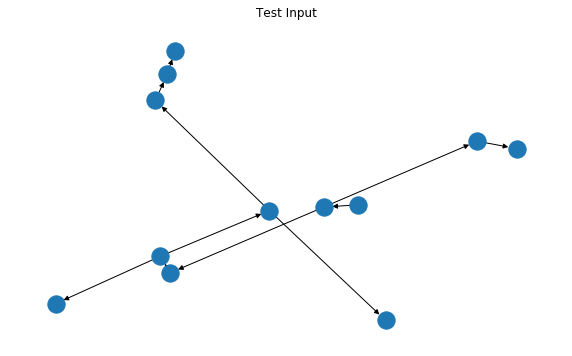

In [121]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Test Input")
nx.draw(G, ax=ax)

## Part 2

Find shortest path b/w two nodes.

Using networkx first for speed:

In [155]:
test_inp2 = """COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L
K)YOU
I)SAN"""

orbits = make_orbits(parse_input())
orbits_test = make_orbits(parse_input(inp=test_inp2))

In [154]:
def solve_2(inp=None, here="YOU", there="SAN", use_nx=False):
    orbits = make_orbits(parse_input(inp=inp))
    
    if use_nx:
        G = nx.Graph(orbits)
        return len(nx.shortest_path(G, here, there)) - 3
    
assert solve_2(test_inp2, use_nx=True) == 4
solve_2(use_nx=True)

346

In [159]:
orbits_test

defaultdict(set,
            {'COM': {'B'},
             'B': {'C', 'G'},
             'C': {'D'},
             'D': {'E', 'I'},
             'E': {'F', 'J'},
             'G': {'H'},
             'J': {'K'},
             'K': {'L', 'YOU'},
             'I': {'SAN'}})

In [169]:
def find_parent(node="YOU", orbits=orbits_test):
    """returns parent node"""
    for parent, children in orbits.items():
        if node in children:
            return parent

assert find_parent("YOU") == "K"
assert find_parent("SAN") == "I"

('K', 'I')

In [ ]:
def solve_2(start="YOU", end="SAN", orbits = orbits_test):
    
    paths = [] # tracking all possible valid paths
    
    stack = deque() # the paths to process
    stack.append([start])
    
    path = stack.popleft()
    print("Starting at node", start, "searching for", destination)
    
    while path[-1] != end:
        if not path in paths: 
            cur_x, cur_y = path[-1]
            for node in [(cur_x+i, cur_y+j) for i,j in moves]:
                new_x, new_y = node
                if is_open(new_x, new_y) and node not in path:
                    new_path = path[:]
                    new_path.append(node)
                    stack.append(new_path) # add all new unseen states to the stack
            paths.append(path) # have now processed this path
            
        try:
            path = stack.popleft()
        except:
            print(f"Error, the stack is empty at loop {i}")
            return paths

In [179]:
start = find_parent("YOU")
end = find_parent("SAN")
print(start, end)

def get_paths(start="YOU", end="SAN", orbits = orbits_test):
    
    stack = deque() # the paths to process
    stack.append([start])
    
    path = stack.popleft()
    print("Starting at node", start, "searching for", destination)
    
    while end not in path and None not in path:
    #while end not in path:
        parent = find_parent(path[-1])
        path.append(parent)
        print(path)
    return path
    
path(start, end)

K I
['K', 'J']
['K', 'J', 'E']
['K', 'J', 'E', 'D']
['K', 'J', 'E', 'D', 'C']
['K', 'J', 'E', 'D', 'C', 'B']
['K', 'J', 'E', 'D', 'C', 'B', 'COM']
['K', 'J', 'E', 'D', 'C', 'B', 'COM', None]


['K', 'J', 'E', 'D', 'C', 'B', 'COM', None]